# $\alpha$

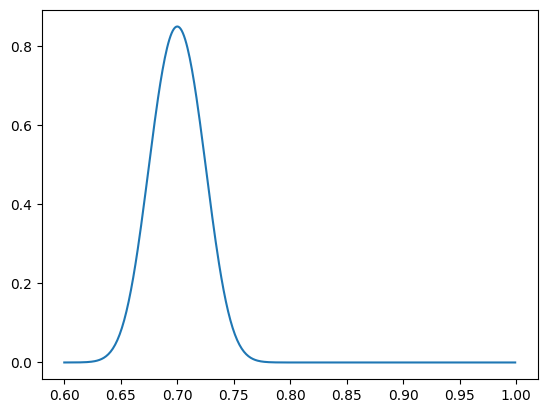

In [2]:
import matplotlib.pyplot as plt
import math


def f(x):

    # xa , xb , d = 0.9 , 1 , 0.05
    # ans = ( 1 + math.erf( (x-xa) / d ) ) * ( 1 - math.erf( (x-xb) / d ) ) / 4

    # ans=math.erf(x)

    xa , xb , d = 0.675 , 0.725 , 0.05
    ans = ( 1 + math.erf( 2*(x-xa) / d ) ) * ( 1 - math.erf( 2*(x-xb) / d ) ) / 4

    return ans

# x = [ i*0.01 for i in range(-500,500)]
# L = [ f(i*0.01) for i in range(-500,500)]
x = [ i*0.001 for i in range(600,1000)]
L = [ f(i*0.001) for i in range(600,1000)]
plt.plot(x,L)


# $\Omega$

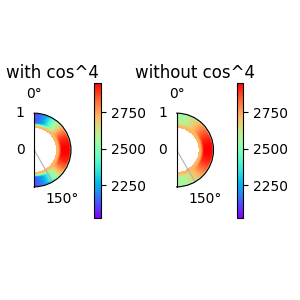

'---------3D---------------------'

In [3]:
%matplotlib widget 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.gridspec as gridspec



def f(x,theta,i):
    O_RZ = 432.8
    if i==0:
        if x<=0.95:
            O_CZ = 470.308 - 62.79*np.cos(theta)**2 - 67.87*np.cos(theta)**4
        else:
            O_CZ = 470.308 - 62.79*np.cos(theta)**2 - 67.87*np.cos(theta)**4 - 16.808*(x-0.95)*20
        O1 = 0.5*(1+math.erf((x-0.7)/0.04))

        ans = ( O_RZ + (O_CZ - O_RZ) * O1 )*2*math.pi

    elif i==1:
        if x<=0.95:
            O_CZ = 470.308 - 62.79*np.cos(theta)**2
        else:
            O_CZ = 470.308 - 62.79*np.cos(theta)**2 - 16.808*(x-0.95)*20
        O1 = 0.5*(1+math.erf((x-0.7)/0.04))

        ans = ( O_RZ + (O_CZ - O_RZ) * O1 )*2*math.pi

    return ans



fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'}, figsize=(3,3))
# fig=plt.figure(figsize=(3,3),dpi=100)
# gs=gridspec.GridSpec(1, 2, width_ratios=[1,1])
# axes = [ plt.subplot( gs[0] , projection='polar' ) , plt.subplot( gs[1] , projection='polar' ) ]
for k in range(2):
    x = np.linspace(0.6,1,100)
    theta = np.linspace(0,np.pi,100)
    xL, thetaL = np.meshgrid( x, theta )
    a,b=xL.shape
    O = np.zeros((a,b))
    M = np.zeros((a,b))
    N = np.zeros((a,b))
    
    for i in range(a):
        for j in range(b):
            x=xL[i][j]
            theta=thetaL[i][j]
            O[i][j] = f(x,theta,k)
            M[i][j] = x*np.cos(theta)
            N[i][j] = x*np.sin(theta)
    if k == 0:
        vmin=O.min()
        vmax=O.max()
    elif k==1:
        if O.min()<vmin:
            vmin=O.min()
        if O.max()>vmax:
            vmax=O.max()

    '----------------------2D----------------------'

    c = axes[k].pcolormesh(thetaL, xL, O, cmap='rainbow',vmin=vmin,vmax=vmax)

    fig.colorbar(c, ax=axes[k],shrink=0.5)



    axes[k].set_thetamin(0.0)
    axes[k].set_thetamax(180.0)
    axes[k].set_theta_offset(1/2*np.pi)
    axes[k].set_theta_direction(-1)
    if k==0:
        axes[k].set_title('with cos^4')
    elif k==1:
        axes[k].set_title('without cos^4')

plt.tight_layout()
plt.show()

'---------3D---------------------'
    # fig = plt.figure()
    # # ax = Axes3D(fig)
    # # fig.add_axes(ax)
    # ax = fig.add_subplot(111, projection='3d')

    # plt.rcParams['font.sans-serif']=['FangSong'] # 用来正常显示中文标签
    # plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

    # ax.plot_surface(M,N,O, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')  
    # plt.show()

